# Data Analysis

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path
import wholeslidedata

ModuleNotFoundError: No module named 'wholeslidedata'

In [13]:
csv_fp = '/data/pathology/users/clement/diag_day/data/dev.csv'
df = pd.read_csv(csv_fp)
df.head()

,patch_path,label,category
0,/data/pathology/users/clement/diag_day/data/de...,0,benign
1,/data/pathology/users/clement/diag_day/data/de...,1,cancer
2,/data/pathology/users/clement/diag_day/data/de...,0,benign
3,/data/pathology/users/clement/diag_day/data/de...,1,cancer
4,/data/pathology/users/clement/diag_day/data/de...,1,cancer


In [14]:
category_counts_df = df.category.value_counts().reset_index().rename(columns={"index": "category", "category": "num"})
category_counts_df.head()

,category,num
0,benign,3000
1,cancer,3000


In [15]:
tmp = df.category.value_counts(dropna=False, normalize=True)
tmp = tmp.mul(100)
tmp = tmp.rename('proportion')
tmp = tmp.reset_index().rename(columns={'index': 'category'})
tmp

,category,proportion
0,benign,50.0
1,cancer,50.0


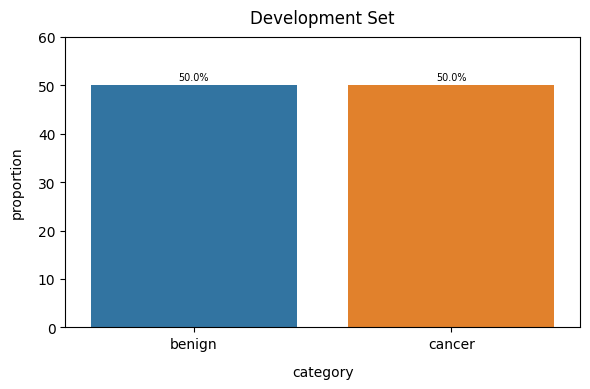

In [16]:
pad = tmp["proportion"].max()*0.02

plt.figure(dpi=100)
ax = sns.barplot(data=tmp, x="category", y="proportion")
for i, p in enumerate(ax.patches):    
    x, y = p.get_x(), p.get_y()
    w, h = p.get_width(), p.get_height()
    txt_x, txt_y = x+w/2, h+pad
    
    plt.text(txt_x, txt_y, f'{h:.1f}%', horizontalalignment='center', size='x-small')

plt.xlabel("category", labelpad=10)
plt.ylabel("proportion", labelpad=10)
plt.ylim(0, max([p.get_height() for p in ax.patches])*1.2)
plt.title(f"Development Set", pad=10)
plt.tight_layout()
plt.savefig("label_dist.png", dpi=300)
plt.show()

In [17]:
tmp = df.label.value_counts(dropna=False)
tmp = tmp.rename('num')
tmp = tmp.reset_index().rename(columns={'index': 'label'})
tmp

,label,num
0,0,3000
1,1,3000


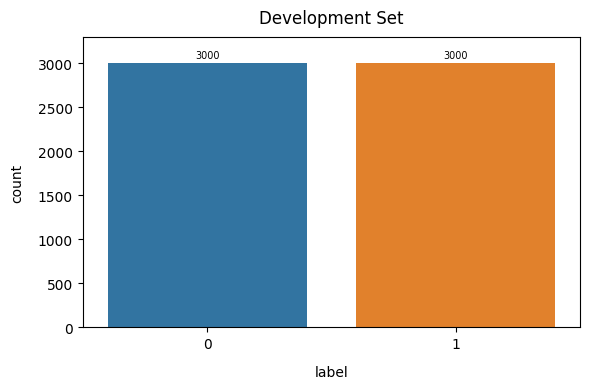

In [18]:
pad = tmp["num"].max()*0.02

plt.figure(dpi=100)
ax = sns.barplot(data=tmp, x="label", y="num")
for i, p in enumerate(ax.patches):    
    x, y = p.get_x(), p.get_y()
    w, h = p.get_width(), p.get_height()
    txt_x, txt_y = x+w/2, h+pad
    
    plt.text(txt_x, txt_y, f'{int(h)}', horizontalalignment='center', size='x-small')

plt.xlabel("label", labelpad=10)
plt.ylabel("count", labelpad=10)
plt.ylim(0, max([p.get_height() for p in ax.patches])*1.1)
plt.title(f"Development Set", pad=10)
plt.tight_layout()
plt.show()

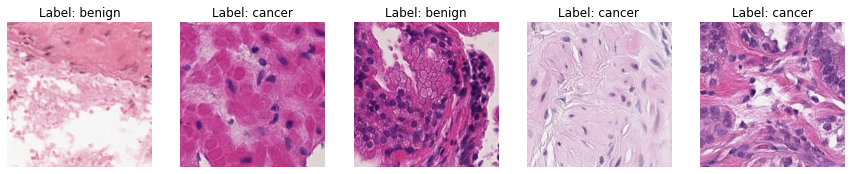

In [19]:
num_examples = 5  # Number of examples to display

# Checking if enough examples are available
if len(df) >= num_examples:
    fig, axes = plt.subplots(1, num_examples, figsize=(15, 5))

    for i, ax in enumerate(axes):
        # Reading the image from the filepath
        img_path = df.iloc[i]['patch_path']
        if Path(img_path).is_file():
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(f'Label: {df.iloc[i]["category"]}')
            ax.axis('off')
        else:
            ax.set_title('Image not found')
            ax.axis('off')
    plt.show()
else:
    print(f"Not enough examples in the dataset, only {len(df)} available.")